<a href="https://colab.research.google.com/github/numoworld/learnpytorchio/blob/main/02.Multilabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

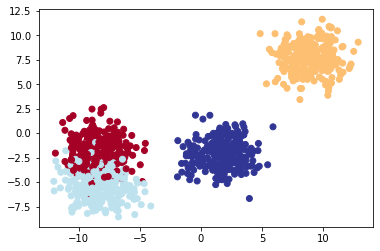

In [68]:
# create blobs dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

N_FEATURES = 2
N_LABELS = 4
N_SAMPLES = 1000
RANDOM_SEED = 721

torch.manual_seed(RANDOM_SEED)

X, y = make_blobs(n_samples=N_SAMPLES,
                  n_features=N_FEATURES,
                  centers=N_LABELS,
                  cluster_std=1.5,
                  random_state=RANDOM_SEED)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [69]:
# create model
from torch import nn


class BlobModel(nn.Module):
  def __init__(self, in_features, out_features, hidden_units=8):
    super().__init__()
    self.linear_layers_stack = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features)
    )

  def forward(self, X):
    return self.linear_layers_stack(X)

model = BlobModel(in_features=2, out_features=4, hidden_units=4).to(device)
model

BlobModel(
  (linear_layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=4, bias=True)
  )
)

In [70]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [71]:
# accuracy eval function
def accuracy_func(y_pred, y_true):
  return (y_pred == y_true).sum() / len(y_pred) * 100

In [72]:
torch.manual_seed(721)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

n_epochs = 1000

for epoch in range(n_epochs):
  model.train()

  y_logits = model(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_func(y_logits, y_train)
  acc = accuracy_func(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 100 == 0:
    model.eval()

    with torch.inference_mode():
      y_logits_test = model(X_test)
      y_pred_test = torch.softmax(y_logits_test, dim=1).argmax(dim=1)

      test_loss = loss_func(y_logits_test, y_test)
      test_acc = accuracy_func(y_pred_test, y_test)

    print(f'Epoch: {epoch}| Train Loss: {loss}| Train Acc: {acc}| Test Loss: {test_loss}| Test Acc: {test_acc}')

Epoch: 0| Train Loss: 1.571354627609253| Train Acc: 0.25| Test Loss: 1.4286422729492188| Test Acc: 4.0
Epoch: 100| Train Loss: 0.44500231742858887| Train Acc: 91.125| Test Loss: 0.47324028611183167| Test Acc: 91.0
Epoch: 200| Train Loss: 0.24614520370960236| Train Acc: 92.875| Test Loss: 0.25308871269226074| Test Acc: 91.0
Epoch: 300| Train Loss: 0.21401874721050262| Train Acc: 93.0| Test Loss: 0.21635955572128296| Test Acc: 91.5
Epoch: 400| Train Loss: 0.2002439647912979| Train Acc: 92.875| Test Loss: 0.19716452062129974| Test Acc: 92.49999237060547
Epoch: 500| Train Loss: 0.1907634288072586| Train Acc: 92.875| Test Loss: 0.18568004667758942| Test Acc: 91.99999237060547
Epoch: 600| Train Loss: 0.18332462012767792| Train Acc: 93.375| Test Loss: 0.17763908207416534| Test Acc: 91.99999237060547
Epoch: 700| Train Loss: 0.17752015590667725| Train Acc: 93.75| Test Loss: 0.1713341325521469| Test Acc: 92.49999237060547
Epoch: 800| Train Loss: 0.1735946089029312| Train Acc: 93.875| Test Loss: 